# HW1 HeapSort

## 學習歷程:
###        在寫Heapsort之前查找了很多資料，想先了解大概的流程是怎樣，一開始還有點看不懂在幹嘛，後來看了台部落(參考資料3)的觀念解析大概知道整個Heapsort 的流程分為兩個部分，第一件事就是要先把數列轉成Maxheap，也就是建造一個最大堆積樹，開始嘗試去用python試寫，如下:

In [3]:
def maxheap(arr, i, length):
    root = i #父節點
    left = 2*i+1 #因陣列索引從0開始，則左設為2*i+1
    right = 2*i+2 #右設為2*i+2
    
    
    
    if left < length and arr[left] > arr[i]: #設定長度界線
        arr[left], arr[i] = arr[i], arr[left]
        root = left
        
        
    if right < length and arr[right] > arr[i]:
        arr[right], arr[i] = arr[i], arr[right]#先換會存在例外情況
        root = right
    if root != i:
        maxheap(arr, root, length)        
        
    print(arr)
    
def forheap(arr):
    length = len(arr)
    leastparent = length // 2 - 1
    
    for i in range(leastparent, -1, -1):
        maxheap(arr, i, length)
    return arr

In [4]:
# 例外情況的例子
c = [36,57,100,23,56,58,67]
forheap(c)

[36, 57, 100, 23, 56, 58, 67]
[36, 57, 100, 23, 56, 58, 67]
[100, 36, 67, 23, 56, 57, 58]
[100, 36, 67, 23, 56, 57, 58]
[100, 36, 67, 23, 56, 57, 58]


[100, 36, 67, 23, 56, 57, 58]

### 一開始的想法是我的root(父節點)的去跟左右邊(子節點)做比大小，如果子節點較大時就直接交換數值，但是這樣會沒辦法顧到換到下面的值會不會有它的子節點較大的情況發生，所以又設定了root去指向左或右的子節點，然後再去重新呼叫maxheap，然而在先換的情況下會出現如果下面的子節點都比較大時，三個數的位置都會變動，而呼叫時會少顧慮到一個，導致maxheap存在錯誤。

### 那如何處理呢? 因想不太到解決方案，後來參考網路的寫法，先不做交換，最後再做交換，到此Maxheap建造出來了，接下來就是利用for迴圈去把最大值index(0)去跟尾巴做交換，再從新呼叫maxheap做調整，最後得到比好大小的數列，如下:
   

In [2]:
def maxheap(arr, i, length):
        root = i #設定root為父節點
        
        left = 2 * i + 1 #左子節點
        
        right = 2 * i + 2 #右子節點
        
        if left < length and arr[left] > arr[root]: 
            #設定長度界線讓它不會超過index的範圍，與左邊的值比大小，如果左邊較大，root指向左子節點
            root = left
        
        if right < length and arr[right] > arr[root]: #如上比大小，如果右邊比較大則root指向右邊
            root = right
    
        if root != i: #最後如果root不指向父節點的索引值時，交換值並且重新呼叫maxheap去做移動到下面的值的比較
            arr[root], arr[i] = arr[i], arr[root]
            maxheap(arr, root, length)
        

In [5]:
def heap_sort(arr):
    
    length = len(arr)
    leastparent = length // 2 - 1 #找出最後一個父節點
    for i in range(leastparent, -1, -1): #把 i 設為從最後一個父節點開始走訪到0，間隔為-1
        maxheap(arr, i, length) #呼叫maxheap開始建造最大堆積樹
    print("maxheap", arr) #檢查有無錯誤
    #開始交換首節點與最後一個節點，並設定長度界線去隔開已交換到後面的首節點
    for i in range(length-1, 0, -1): #長度-1為最後一個
        arr[i], arr[0] = arr[0], arr[i]
        maxheap(arr, 0, i) #從新呼叫，i為長度界線
    return arr

### 我知道這個程式碼當然跟原來的參考網站大部分相同，但我也去了解了整個程式碼背後運作的過程，並且也在紙上一次一次去推它的數字會如何去變動以及利用print去看它變動的過程，在這過程中我也更了解程式碼的運作流程，或許我還沒辦法寫出自己的風格，但我有確實學習到東西，希望可以不要直接認定為抄襲。

#### 參考資料:https://www.runoob.com/python3/python-heap-sort.html(主要程式碼參考)
####                 https://www.runoob.com/python/python-func-range.html)(range函數用法)
####                 https://www.twblogs.net/a/5c7100f9bd9eee68dc3f1be8(觀念解析)


## 流程圖

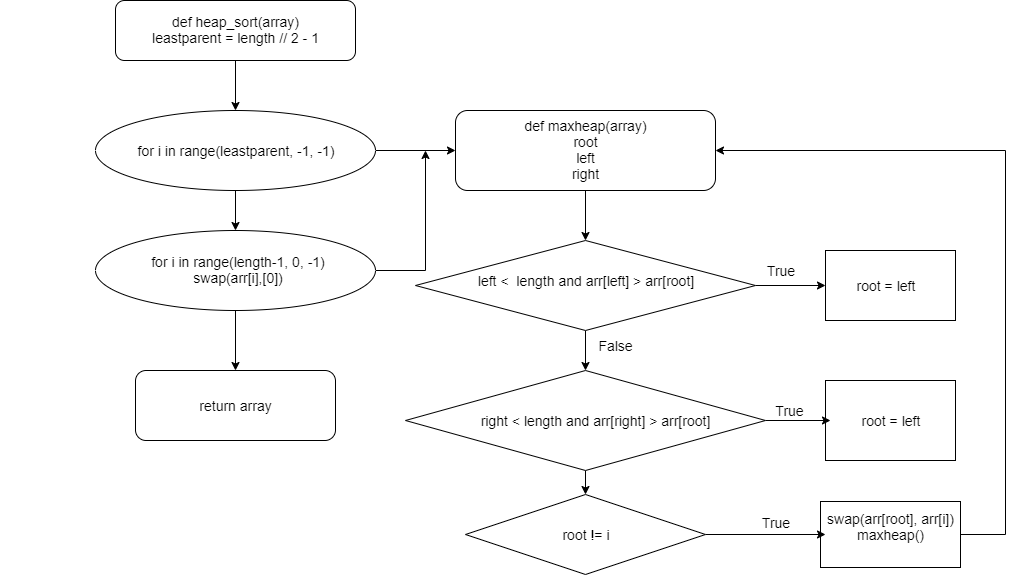

In [9]:
PATH = "C:/Users/neo/Downloads/"
Image(filename = PATH + "heapsort.png", width=800, height=800)

In [6]:
from IPython.display import Image
from IPython.core.display import HTML